# US Housing Price

__Ques.__ Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.

Use the S&P Case-Schiller Home Price Index as a proxy for home prices :(fred.stlouisfed.org/series/CSUSHPISA).

__Understanding the problem:__

First of all, we need to figure out what are the key factors which are influcening US home price nationally. After that, we need to get the valid and trustable sources so that we can use them in the data.


## Factors influencing the US home price nationally

1. GDP
2. Unemployement rate
3. Inflation
4. Population growth
5. Mortgages rate
6. Federal fund rate
7. Housing supply


### Note:

There are other factors which influnces the house price such as the average size of the house, immigration population, marriages, locality parameters and various other factors. But, either suitable data is not present or due to time constraint, it could be processed.

In [1]:
import pandas as pd
import numpy as np

In [93]:
cost = pd.read_csv("CSUSHPISA cost parameter.csv")

In [94]:
cost

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.425
2,1987-03-01,64.735
3,1987-04-01,65.132
4,1987-05-01,65.564
...,...,...
441,2023-10-01,312.946
442,2023-11-01,313.629
443,2023-12-01,314.338
444,2024-01-01,315.297


Here the cost is give month wise. So, let us pick data for the other factors also.

In [95]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       446 non-null    object 
 1   CSUSHPISA  446 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


In [96]:
cost.columns = ['Date','cost_index']

In [97]:
cost

,Date,cost_index
0,1987-01-01,63.965
1,1987-02-01,64.425
2,1987-03-01,64.735
3,1987-04-01,65.132
4,1987-05-01,65.564
...,...,...
441,2023-10-01,312.946
442,2023-11-01,313.629
443,2023-12-01,314.338
444,2024-01-01,315.297


In [98]:
cost.Date = pd.to_datetime(cost.Date).dt.strftime("%m-%Y")

In [99]:
cost

,Date,cost_index
0,01-1987,63.965
1,02-1987,64.425
2,03-1987,64.735
3,04-1987,65.132
4,05-1987,65.564
...,...,...
441,10-2023,312.946
442,11-2023,313.629
443,12-2023,314.338
444,01-2024,315.297


In [100]:
specific_date = '01-2000'

In [104]:
index = cost.index[cost['Date'] == specific_date].tolist()

In [105]:
index

[156]

In [106]:
cost[156:]

,Date,cost_index
156,01-2000,100.552
157,02-2000,101.339
158,03-2000,102.126
159,04-2000,102.922
160,05-2000,103.678
...,...,...
441,10-2023,312.946
442,11-2023,313.629
443,12-2023,314.338
444,01-2024,315.297


In [107]:
cost = cost[156:].reset_index(drop = True)

In [108]:
cost

,Date,cost_index
0,01-2000,100.552
1,02-2000,101.339
2,03-2000,102.126
3,04-2000,102.922
4,05-2000,103.678
...,...,...
285,10-2023,312.946
286,11-2023,313.629
287,12-2023,314.338
288,01-2024,315.297


## 1. GDP per capita

GDP per capita is a significant parameter, which will help us understand the buying power of the people! Though is it not that accurate a parameter, but it is a fair estimate!

The data is sourced from:  https://fred.stlouisfed.org/series/A939RX0Q048SBEA

The data is chained with 2017 USD

In [4]:
gdp_perCapita = pd.read_csv("gdp_per capita.csv")

In [5]:
gdp_perCapita

,DATE,A939RX0Q048SBEA
0,1947-01-01,15248.0
1,1947-04-01,15139.0
2,1947-07-01,15039.0
3,1947-10-01,15204.0
4,1948-01-01,15371.0
...,...,...
304,2023-01-01,66096.0
305,2023-04-01,66357.0
306,2023-07-01,67050.0
307,2023-10-01,67513.0


So, here the data is present for a very long period of time. First we'll reduce the time period and then we'll use linear interpolation so that we have values for each month. 

We are considering monthly value for this!

In [6]:
gdp_perCapita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             309 non-null    object 
 1   A939RX0Q048SBEA  309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [7]:
gdp_perCapita['DATE'] = pd.to_datetime(gdp_perCapita['DATE'])

In [8]:
gdp_perCapita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             309 non-null    datetime64[ns]
 1   A939RX0Q048SBEA  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [9]:
gdp_perCapita

,DATE,A939RX0Q048SBEA
0,1947-01-01,15248.0
1,1947-04-01,15139.0
2,1947-07-01,15039.0
3,1947-10-01,15204.0
4,1948-01-01,15371.0
...,...,...
304,2023-01-01,66096.0
305,2023-04-01,66357.0
306,2023-07-01,67050.0
307,2023-10-01,67513.0


In [10]:
specific_date = '2000-01-01'

In [11]:
index = gdp_perCapita.index[gdp_perCapita['DATE']==specific_date].tolist()

In [12]:
index

[212]

So, from here we understand that from the index value 212 we'll have the time period of 2000 onwards.

In [13]:
gdp_perCapita[212:]

,DATE,A939RX0Q048SBEA
212,2000-01-01,49335.0
213,2000-04-01,50109.0
214,2000-07-01,50024.0
215,2000-10-01,50190.0
216,2001-01-01,49911.0
...,...,...
304,2023-01-01,66096.0
305,2023-04-01,66357.0
306,2023-07-01,67050.0
307,2023-10-01,67513.0


In [14]:
gdp_perCapita = gdp_perCapita[212:].reset_index(drop = True)

In [15]:
gdp_perCapita

,DATE,A939RX0Q048SBEA
0,2000-01-01,49335.0
1,2000-04-01,50109.0
2,2000-07-01,50024.0
3,2000-10-01,50190.0
4,2001-01-01,49911.0
...,...,...
92,2023-01-01,66096.0
93,2023-04-01,66357.0
94,2023-07-01,67050.0
95,2023-10-01,67513.0


In [16]:
gdp_perCapita.columns = ['Date','gdp_pCapita']

In [17]:
gdp_perCapita

,Date,gdp_pCapita
0,2000-01-01,49335.0
1,2000-04-01,50109.0
2,2000-07-01,50024.0
3,2000-10-01,50190.0
4,2001-01-01,49911.0
...,...,...
92,2023-01-01,66096.0
93,2023-04-01,66357.0
94,2023-07-01,67050.0
95,2023-10-01,67513.0


In [18]:
gdp_perCapita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         97 non-null     datetime64[ns]
 1   gdp_pCapita  97 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [19]:
# now we will set the Date column as the index first, and then we'll perform the interpolation
gdp_perCapita.set_index('Date', inplace=True)

In [20]:
gdp_perCapita

,gdp_pCapita
Date,
2000-01-01,49335.0
2000-04-01,50109.0
2000-07-01,50024.0
2000-10-01,50190.0
2001-01-01,49911.0
...,...
2023-01-01,66096.0
2023-04-01,66357.0
2023-07-01,67050.0


In [21]:
# Now we'll resample the data to a monthly frequency and perform linear interpolation
gdp_unsampled = gdp_perCapita.resample('M').mean()

In [22]:
gdp_unsampled

,gdp_pCapita
Date,
2000-01-31,49335.0
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,50109.0
2000-05-31,NaN
...,...
2023-09-30,NaN
2023-10-31,67513.0
2023-11-30,NaN


In [23]:
gdp_monthly = gdp_unsampled.interpolate(method = 'linear')

In [24]:
gdp_monthly

,gdp_pCapita
Date,
2000-01-31,49335.000000
2000-02-29,49593.000000
2000-03-31,49851.000000
2000-04-30,50109.000000
2000-05-31,50080.666667
...,...
2023-09-30,67358.666667
2023-10-31,67513.000000
2023-11-30,67576.000000


In [25]:
gdp_monthly = np.round(gdp_monthly['gdp_pCapita'])

In [26]:
gdp_monthly

Date
2000-01-31    49335.0
2000-02-29    49593.0
2000-03-31    49851.0
2000-04-30    50109.0
2000-05-31    50081.0
               ...   
2023-09-30    67359.0
2023-10-31    67513.0
2023-11-30    67576.0
2023-12-31    67639.0
2024-01-31    67702.0
Freq: M, Name: gdp_pCapita, Length: 289, dtype: float64

In [27]:
gdp_monthly = pd.DataFrame(gdp_monthly)

In [28]:
gdp_monthly

,gdp_pCapita
Date,
2000-01-31,49335.0
2000-02-29,49593.0
2000-03-31,49851.0
2000-04-30,50109.0
2000-05-31,50081.0
...,...
2023-09-30,67359.0
2023-10-31,67513.0
2023-11-30,67576.0


In [29]:
gdp_monthly.reset_index(inplace = True)
print(gdp_monthly)

          Date  gdp_pCapita
0   2000-01-31      49335.0
1   2000-02-29      49593.0
2   2000-03-31      49851.0
3   2000-04-30      50109.0
4   2000-05-31      50081.0
..         ...          ...
284 2023-09-30      67359.0
285 2023-10-31      67513.0
286 2023-11-30      67576.0
287 2023-12-31      67639.0
288 2024-01-31      67702.0

[289 rows x 2 columns]


In [30]:
gdp_monthly.head()

,Date,gdp_pCapita
0,2000-01-31,49335.0
1,2000-02-29,49593.0
2,2000-03-31,49851.0
3,2000-04-30,50109.0
4,2000-05-31,50081.0


In [31]:
gdp_monthly['Date'] = gdp_monthly['Date'].dt.strftime('%m-%Y')

In [32]:
gdp_monthly

,Date,gdp_pCapita
0,01-2000,49335.0
1,02-2000,49593.0
2,03-2000,49851.0
3,04-2000,50109.0
4,05-2000,50081.0
...,...,...
284,09-2023,67359.0
285,10-2023,67513.0
286,11-2023,67576.0
287,12-2023,67639.0


Perfect! Our data for monthly gdp per capita is ready to be used! Now, let us just prepare the other columns of the dataset, and then finally we would merge them into a signle dataframe.

## 2. Unemployement Rate

Unemployement rate is taken from: https://fred.stlouisfed.org/series/UNRATE

The unit is in percentage and the data is seasoanlly adjusted.

In [34]:
uemp_rate = pd.read_csv("uemp_rate.csv")

In [35]:
uemp_rate

,DATE,UNRATE
0,1999-10-01,4.1
1,1999-11-01,4.1
2,1999-12-01,4.0
3,2000-01-01,4.0
4,2000-02-01,4.1
...,...,...
290,2023-12-01,3.7
291,2024-01-01,3.7
292,2024-02-01,3.9
293,2024-03-01,3.8


Let us consider data from 2000 onwards only!

In [36]:
uemp_rate[3:]

,DATE,UNRATE
3,2000-01-01,4.0
4,2000-02-01,4.1
5,2000-03-01,4.0
6,2000-04-01,3.8
7,2000-05-01,4.0
...,...,...
290,2023-12-01,3.7
291,2024-01-01,3.7
292,2024-02-01,3.9
293,2024-03-01,3.8


In [37]:
uemp_rate = uemp_rate[3:].reset_index(drop = True)

In [38]:
uemp_rate

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
287,2023-12-01,3.7
288,2024-01-01,3.7
289,2024-02-01,3.9
290,2024-03-01,3.8


In [39]:
uemp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    292 non-null    object 
 1   UNRATE  292 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [40]:
uemp_rate.columns = ['Date','Uemployemet Rate']

In [41]:
uemp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              292 non-null    object 
 1   Uemployemet Rate  292 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [44]:
uemp_rate.Date = pd.to_datetime(uemp_rate['Date']).dt.strftime("%m-%Y")

In [45]:
uemp_rate

,Date,Uemployemet Rate
0,01-2000,4.0
1,02-2000,4.1
2,03-2000,4.0
3,04-2000,3.8
4,05-2000,4.0
...,...,...
287,12-2023,3.7
288,01-2024,3.7
289,02-2024,3.9
290,03-2024,3.8


So, unemployement rate is ready to be used in the dataset!

## 3. Inflation

CPI inflatio is taken from here:
https://fred.stlouisfed.org/series/CPIAUCSL


It is seasonally adjusted and has unit index as 1982-1984 = 100

In [46]:
inflation = pd.read_csv("cpi.csv")

In [48]:
inflation

,DATE,CPIAUCSL
0,2000-01-01,169.300
1,2000-02-01,170.000
2,2000-03-01,171.000
3,2000-04-01,170.900
4,2000-05-01,171.200
...,...,...
287,2023-12-01,308.742
288,2024-01-01,309.685
289,2024-02-01,311.054
290,2024-03-01,312.230


In [49]:
inflation.columns = ['Date','cpi']

In [50]:
inflation

,Date,cpi
0,2000-01-01,169.300
1,2000-02-01,170.000
2,2000-03-01,171.000
3,2000-04-01,170.900
4,2000-05-01,171.200
...,...,...
287,2023-12-01,308.742
288,2024-01-01,309.685
289,2024-02-01,311.054
290,2024-03-01,312.230


In [51]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    292 non-null    object 
 1   cpi     292 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [52]:
inflation.Date = pd.to_datetime(inflation.Date).dt.strftime("%m-%Y")

In [54]:
inflation

,Date,cpi
0,01-2000,169.300
1,02-2000,170.000
2,03-2000,171.000
3,04-2000,170.900
4,05-2000,171.200
...,...,...
287,12-2023,308.742
288,01-2024,309.685
289,02-2024,311.054
290,03-2024,312.230


## 4. Population Growth

The data is sourced from: https://fred.stlouisfed.org/series/POPTHM

The unit is 'Thousands'

In [55]:
population = pd.read_csv("population.csv")

In [56]:
population

,DATE,POPTHM
0,2000-01-01,281083.0
1,2000-02-01,281299.0
2,2000-03-01,281531.0
3,2000-04-01,281763.0
4,2000-05-01,281996.0
...,...,...
286,2023-11-01,335925.0
287,2023-12-01,336070.0
288,2024-01-01,336194.0
289,2024-02-01,336306.0


In [57]:
population.columns = ['Date', 'population']

In [58]:
population

,Date,population
0,2000-01-01,281083.0
1,2000-02-01,281299.0
2,2000-03-01,281531.0
3,2000-04-01,281763.0
4,2000-05-01,281996.0
...,...,...
286,2023-11-01,335925.0
287,2023-12-01,336070.0
288,2024-01-01,336194.0
289,2024-02-01,336306.0


In [59]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        291 non-null    object 
 1   population  291 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [60]:
population.Date = pd.to_datetime(population.Date).dt.strftime("%m-%Y")

In [62]:
population

,Date,population
0,01-2000,281083.0
1,02-2000,281299.0
2,03-2000,281531.0
3,04-2000,281763.0
4,05-2000,281996.0
...,...,...
286,11-2023,335925.0
287,12-2023,336070.0
288,01-2024,336194.0
289,02-2024,336306.0


## 5. Mortgage rate

The data is sourced from: https://fred.stlouisfed.org/series/MORTGAGE30US#0

It is monthly data, and is in percentage

In [63]:
mortgage = pd.read_csv("mortgage.csv")

In [64]:
mortgage

,DATE,MORTGAGE30US
0,2000-01-01,8.2100
1,2000-02-01,8.3250
2,2000-03-01,8.2400
3,2000-04-01,8.1525
4,2000-05-01,8.5150
...,...,...
288,2024-01-01,6.6425
289,2024-02-01,6.7760
290,2024-03-01,6.8200
291,2024-04-01,6.9925


In [65]:
mortgage.columns = ['Date', 'mortgage']

In [66]:
mortgage

,Date,mortgage
0,2000-01-01,8.2100
1,2000-02-01,8.3250
2,2000-03-01,8.2400
3,2000-04-01,8.1525
4,2000-05-01,8.5150
...,...,...
288,2024-01-01,6.6425
289,2024-02-01,6.7760
290,2024-03-01,6.8200
291,2024-04-01,6.9925


In [67]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      293 non-null    object 
 1   mortgage  293 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [68]:
mortgage.Date = pd.to_datetime(mortgage.Date).dt.strftime("%m-%Y")

In [69]:
mortgage

,Date,mortgage
0,01-2000,8.2100
1,02-2000,8.3250
2,03-2000,8.2400
3,04-2000,8.1525
4,05-2000,8.5150
...,...,...
288,01-2024,6.6425
289,02-2024,6.7760
290,03-2024,6.8200
291,04-2024,6.9925


## 6. Federal fund rate

The data is sourced from: https://fred.stlouisfed.org/series/DFF

Monthly data, and the data is in percentage

In [72]:
federalRate = pd.read_csv("federal_funds.csv")

In [73]:
federalRate

,DATE,DFF
0,2000-01-01,5.448387
1,2000-02-01,5.734828
2,2000-03-01,5.853548
3,2000-04-01,6.019667
4,2000-05-01,6.268065
...,...,...
288,2024-01-01,5.330000
289,2024-02-01,5.330000
290,2024-03-01,5.330000
291,2024-04-01,5.330000


In [74]:
federalRate.columns = ['Date','federal_rate']

In [75]:
federalRate

,Date,federal_rate
0,2000-01-01,5.448387
1,2000-02-01,5.734828
2,2000-03-01,5.853548
3,2000-04-01,6.019667
4,2000-05-01,6.268065
...,...,...
288,2024-01-01,5.330000
289,2024-02-01,5.330000
290,2024-03-01,5.330000
291,2024-04-01,5.330000


In [76]:
federalRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          293 non-null    object 
 1   federal_rate  293 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [77]:
federalRate.Date = pd.to_datetime(federalRate.Date).dt.strftime("%m-%Y") 

In [78]:
federalRate

,Date,federal_rate
0,01-2000,5.448387
1,02-2000,5.734828
2,03-2000,5.853548
3,04-2000,6.019667
4,05-2000,6.268065
...,...,...
288,01-2024,5.330000
289,02-2024,5.330000
290,03-2024,5.330000
291,04-2024,5.330000


## 7. Housing supply

The data is sourced from: https://fred.stlouisfed.org/series/COMPUTSA

The unit is in 'Thousands'

In [79]:
housing = pd.read_csv("housing.csv")

In [81]:
housing

,DATE,COMPUTSA
0,2000-01-01,1574.0
1,2000-02-01,1677.0
2,2000-03-01,1704.0
3,2000-04-01,1610.0
4,2000-05-01,1682.0
...,...,...
287,2023-12-01,1557.0
288,2024-01-01,1504.0
289,2024-02-01,1698.0
290,2024-03-01,1495.0


In [82]:
housing.columns = ['Date','housing_supply']

In [83]:
housing

,Date,housing_supply
0,2000-01-01,1574.0
1,2000-02-01,1677.0
2,2000-03-01,1704.0
3,2000-04-01,1610.0
4,2000-05-01,1682.0
...,...,...
287,2023-12-01,1557.0
288,2024-01-01,1504.0
289,2024-02-01,1698.0
290,2024-03-01,1495.0


In [86]:
housing.Date = pd.to_datetime(housing.Date).dt.strftime("%m-%Y")

In [87]:
housing

,Date,housing_supply
0,01-2000,1574.0
1,02-2000,1677.0
2,03-2000,1704.0
3,04-2000,1610.0
4,05-2000,1682.0
...,...,...
287,12-2023,1557.0
288,01-2024,1504.0
289,02-2024,1698.0
290,03-2024,1495.0


## Preparing final dataset

Now, let us just merge all the datasets together to form a single table.

In [111]:
from functools import reduce

In [112]:
dataframes = [cost, gdp_monthly, uemp_rate, inflation, population, mortgage, federalRate, housing]

# Merge all DataFrames on the 'Date' column using an outer join
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), dataframes)

In [113]:
merged_df

,Date,cost_index,gdp_pCapita,Uemployemet Rate,cpi,population,mortgage,federal_rate,housing_supply
0,01-2000,100.552,49335.0,4.0,169.300,281083.0,8.2100,5.448387,1574.0
1,02-2000,101.339,49593.0,4.1,170.000,281299.0,8.3250,5.734828,1677.0
2,03-2000,102.126,49851.0,4.0,171.000,281531.0,8.2400,5.853548,1704.0
3,04-2000,102.922,50109.0,3.8,170.900,281763.0,8.1525,6.019667,1610.0
4,05-2000,103.678,50081.0,4.0,171.200,281996.0,8.5150,6.268065,1682.0
...,...,...,...,...,...,...,...,...,...
288,01-2024,315.297,67702.0,3.7,309.685,336194.0,6.6425,5.330000,1504.0
289,02-2024,316.576,NaN,3.9,311.054,336306.0,6.7760,5.330000,1698.0
290,03-2024,NaN,NaN,3.8,312.230,336423.0,6.8200,5.330000,1495.0
291,04-2024,NaN,NaN,3.9,313.207,NaN,6.9925,5.330000,1623.0


In [114]:
df = merged_df.copy()

In [117]:
df.dropna(inplace = True)

In [118]:
df

,Date,cost_index,gdp_pCapita,Uemployemet Rate,cpi,population,mortgage,federal_rate,housing_supply
0,01-2000,100.552,49335.0,4.0,169.300,281083.0,8.2100,5.448387,1574.0
1,02-2000,101.339,49593.0,4.1,170.000,281299.0,8.3250,5.734828,1677.0
2,03-2000,102.126,49851.0,4.0,171.000,281531.0,8.2400,5.853548,1704.0
3,04-2000,102.922,50109.0,3.8,170.900,281763.0,8.1525,6.019667,1610.0
4,05-2000,103.678,50081.0,4.0,171.200,281996.0,8.5150,6.268065,1682.0
...,...,...,...,...,...,...,...,...,...
284,09-2023,311.065,67359.0,3.8,307.288,335612.0,7.2000,5.330000,1466.0
285,10-2023,312.946,67513.0,3.8,307.531,335773.0,7.6200,5.330000,1382.0
286,11-2023,313.629,67576.0,3.7,308.024,335925.0,7.4420,5.330000,1466.0
287,12-2023,314.338,67639.0,3.7,308.742,336070.0,6.8150,5.330000,1557.0


### Conclusion on the merged dataset

This implies that data is present for all the factors upto Janurary 2024! So, now we are ready to perform EDA and visualization on the dataset.

Let us fix the date column and extract the required information from it!

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              289 non-null    object 
 1   cost_index        289 non-null    float64
 2   gdp_pCapita       289 non-null    float64
 3   Uemployemet Rate  289 non-null    float64
 4   cpi               289 non-null    float64
 5   population        289 non-null    float64
 6   mortgage          289 non-null    float64
 7   federal_rate      289 non-null    float64
 8   housing_supply    289 non-null    float64
dtypes: float64(8), object(1)
memory usage: 22.6+ KB


In [121]:
df.Date = pd.to_datetime(df.Date)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7964\4238552302.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Date = pd.to_datetime(df.Date)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              289 non-null    datetime64[ns]
 1   cost_index        289 non-null    float64       
 2   gdp_pCapita       289 non-null    float64       
 3   Uemployemet Rate  289 non-null    float64       
 4   cpi               289 non-null    float64       
 5   population        289 non-null    float64       
 6   mortgage          289 non-null    float64       
 7   federal_rate      289 non-null    float64       
 8   housing_supply    289 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 22.6 KB


In [124]:
df.head()

,Date,cost_index,gdp_pCapita,Uemployemet Rate,cpi,population,mortgage,federal_rate,housing_supply
0,2000-01-01,100.552,49335.0,4.0,169.3,281083.0,8.2100,5.448387,1574.0
1,2000-02-01,101.339,49593.0,4.1,170.0,281299.0,8.3250,5.734828,1677.0
2,2000-03-01,102.126,49851.0,4.0,171.0,281531.0,8.2400,5.853548,1704.0
3,2000-04-01,102.922,50109.0,3.8,170.9,281763.0,8.1525,6.019667,1610.0
4,2000-05-01,103.678,50081.0,4.0,171.2,281996.0,8.5150,6.268065,1682.0


In [126]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [127]:
df

,Date,cost_index,gdp_pCapita,Uemployemet Rate,cpi,population,mortgage,federal_rate,housing_supply,Year,Month
0,2000-01-01,100.552,49335.0,4.0,169.300,281083.0,8.2100,5.448387,1574.0,2000,1
1,2000-02-01,101.339,49593.0,4.1,170.000,281299.0,8.3250,5.734828,1677.0,2000,2
2,2000-03-01,102.126,49851.0,4.0,171.000,281531.0,8.2400,5.853548,1704.0,2000,3
3,2000-04-01,102.922,50109.0,3.8,170.900,281763.0,8.1525,6.019667,1610.0,2000,4
4,2000-05-01,103.678,50081.0,4.0,171.200,281996.0,8.5150,6.268065,1682.0,2000,5
...,...,...,...,...,...,...,...,...,...,...,...
284,2023-09-01,311.065,67359.0,3.8,307.288,335612.0,7.2000,5.330000,1466.0,2023,9
285,2023-10-01,312.946,67513.0,3.8,307.531,335773.0,7.6200,5.330000,1382.0,2023,10
286,2023-11-01,313.629,67576.0,3.7,308.024,335925.0,7.4420,5.330000,1466.0,2023,11
287,2023-12-01,314.338,67639.0,3.7,308.742,336070.0,6.8150,5.330000,1557.0,2023,12


In [128]:
df.drop('Date', axis = 1, inplace = True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 288
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cost_index        289 non-null    float64
 1   gdp_pCapita       289 non-null    float64
 2   Uemployemet Rate  289 non-null    float64
 3   cpi               289 non-null    float64
 4   population        289 non-null    float64
 5   mortgage          289 non-null    float64
 6   federal_rate      289 non-null    float64
 7   housing_supply    289 non-null    float64
 8   Year              289 non-null    int32  
 9   Month             289 non-null    int32  
dtypes: float64(8), int32(2)
memory usage: 22.6 KB


## Bi-variate analysis

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt


Analyzing relationship between cost_index and gdp_pCapita

Correlation between cost_index and gdp_pCapita: 0.9362496870490088


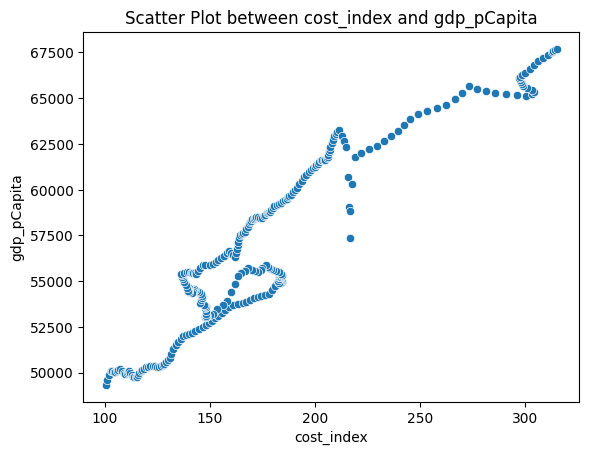


Analyzing relationship between cost_index and Uemployemet Rate

Correlation between cost_index and Uemployemet Rate: -0.3801565059855078


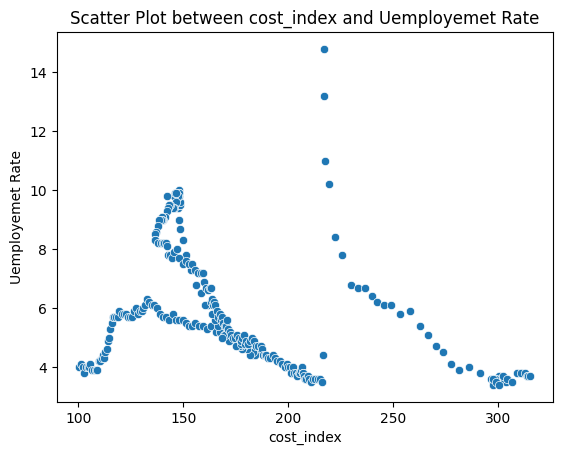


Analyzing relationship between cost_index and cpi

Correlation between cost_index and cpi: 0.8937494150759612


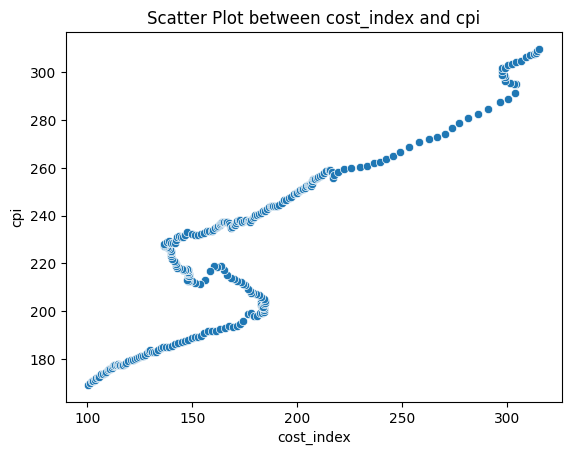


Analyzing relationship between cost_index and population

Correlation between cost_index and population: 0.7844403173202456


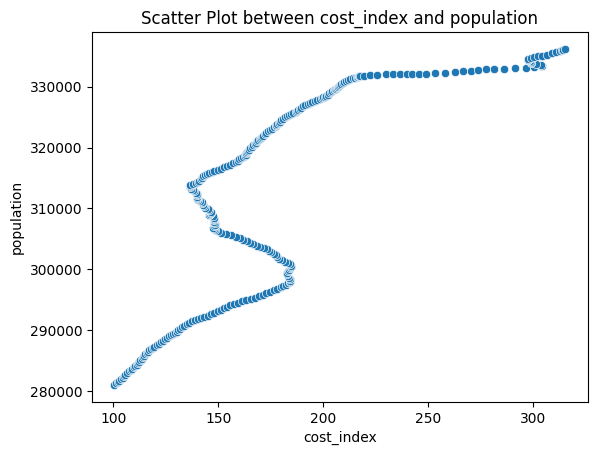


Analyzing relationship between cost_index and mortgage

Correlation between cost_index and mortgage: -0.23537154512833408


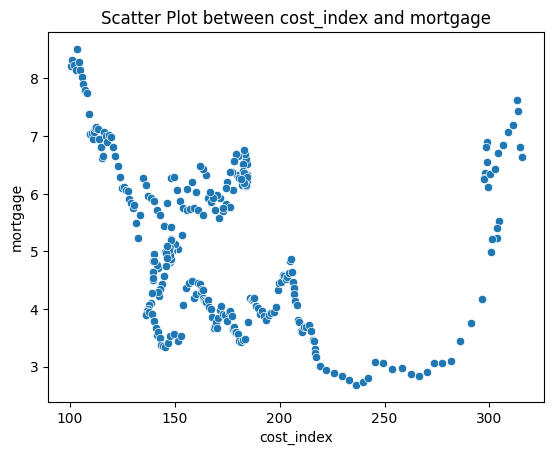


Analyzing relationship between cost_index and federal_rate

Correlation between cost_index and federal_rate: 0.060512343772538814


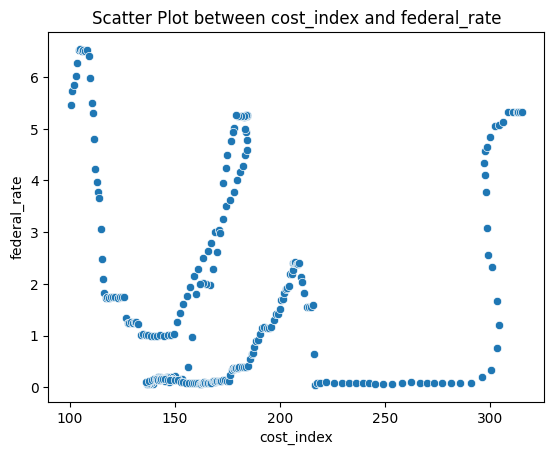


Analyzing relationship between cost_index and housing_supply

Correlation between cost_index and housing_supply: 0.1040683952158527


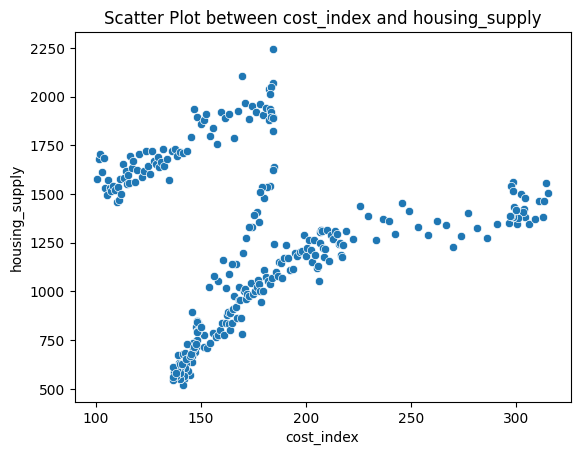


Analyzing relationship between cost_index and Year

Correlation between cost_index and Year: 0.8344379849193616


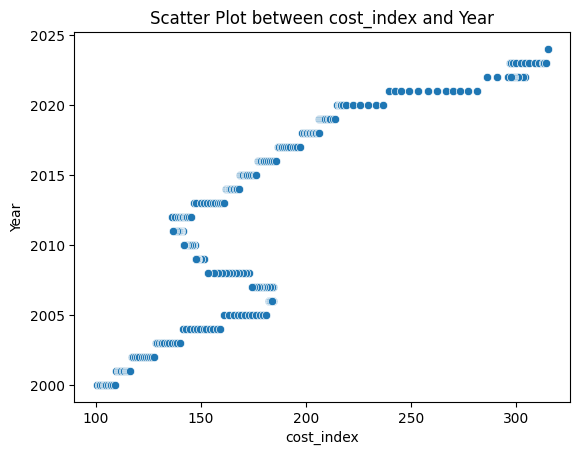


Analyzing relationship between cost_index and Month

Correlation between cost_index and Month: 0.034590738828109986


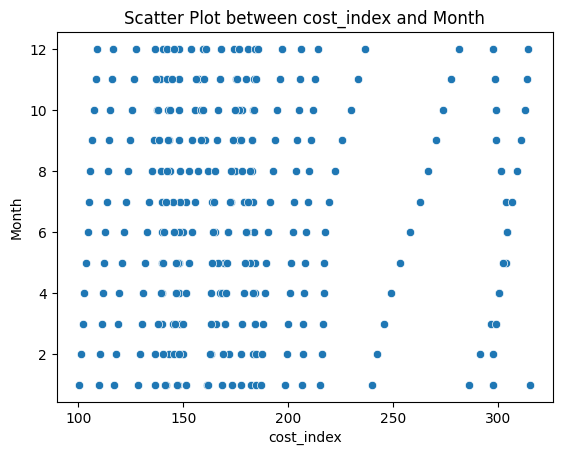

In [142]:
def bivariate_analysis(df, target_column):
    # List all columns except the target column
    columns = [col for col in df.columns if col != target_column]
    
    for col in columns:
        print(f"\nAnalyzing relationship between {target_column} and {col}\n")
        
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculate and print the correlation coefficient
            correlation = df[target_column].corr(df[col])
            print(f"Correlation between {target_column} and {col}: {correlation}")
            
            # Scatter plot
            sns.scatterplot(y=df[col], x=df[target_column])
            plt.ylabel(col)
            plt.xlabel(target_column)
            plt.title(f'Scatter Plot between {target_column} and {col}')
            plt.show()
        
        # Check if the column is categorical
        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
            # Box plot
            sns.boxplot(y=df[col], x=df[target_column])
            plt.ylabel(col)
            plt.xlabel(target_column)
            plt.title(f'Box Plot between {target_column} and {col}')
            plt.xticks(rotation=90)
            plt.show()
            
            # Calculate and print group statistics
            group_stats = df.groupby(col)[target_column].describe()
            print(group_stats)
            
        else:
            print(f"Column {col} is neither numerical nor categorical in the expected format.")

# Call the function
bivariate_analysis(df, 'cost_index')

__Conclusion:__

The cost index is almost linearly correlated with 'GDP per capita', 'CPI', 'Population', and 'Year'

__What does this mean?__

- As the per capita GDP increased, the housing cost goes up.
- As the CPI (consumer price inflation) increases, the housing cost is expected to go up.
- Also, with population the housing cost went up.
- And, likewise, as we are moving forward in time, the cost is going up.

__Other factors:__

- As the unemployement rate is going down, the housing cost tends to increase. This is due to the fact that as the unemployement rate decreases, people have more money in their pocket. And more money is chasing the limited resources, so the prices are going up!

__Remaining factors:__

- Mortgage fund, federal funds rate and monthly data need to be further explored using other type of graphs.

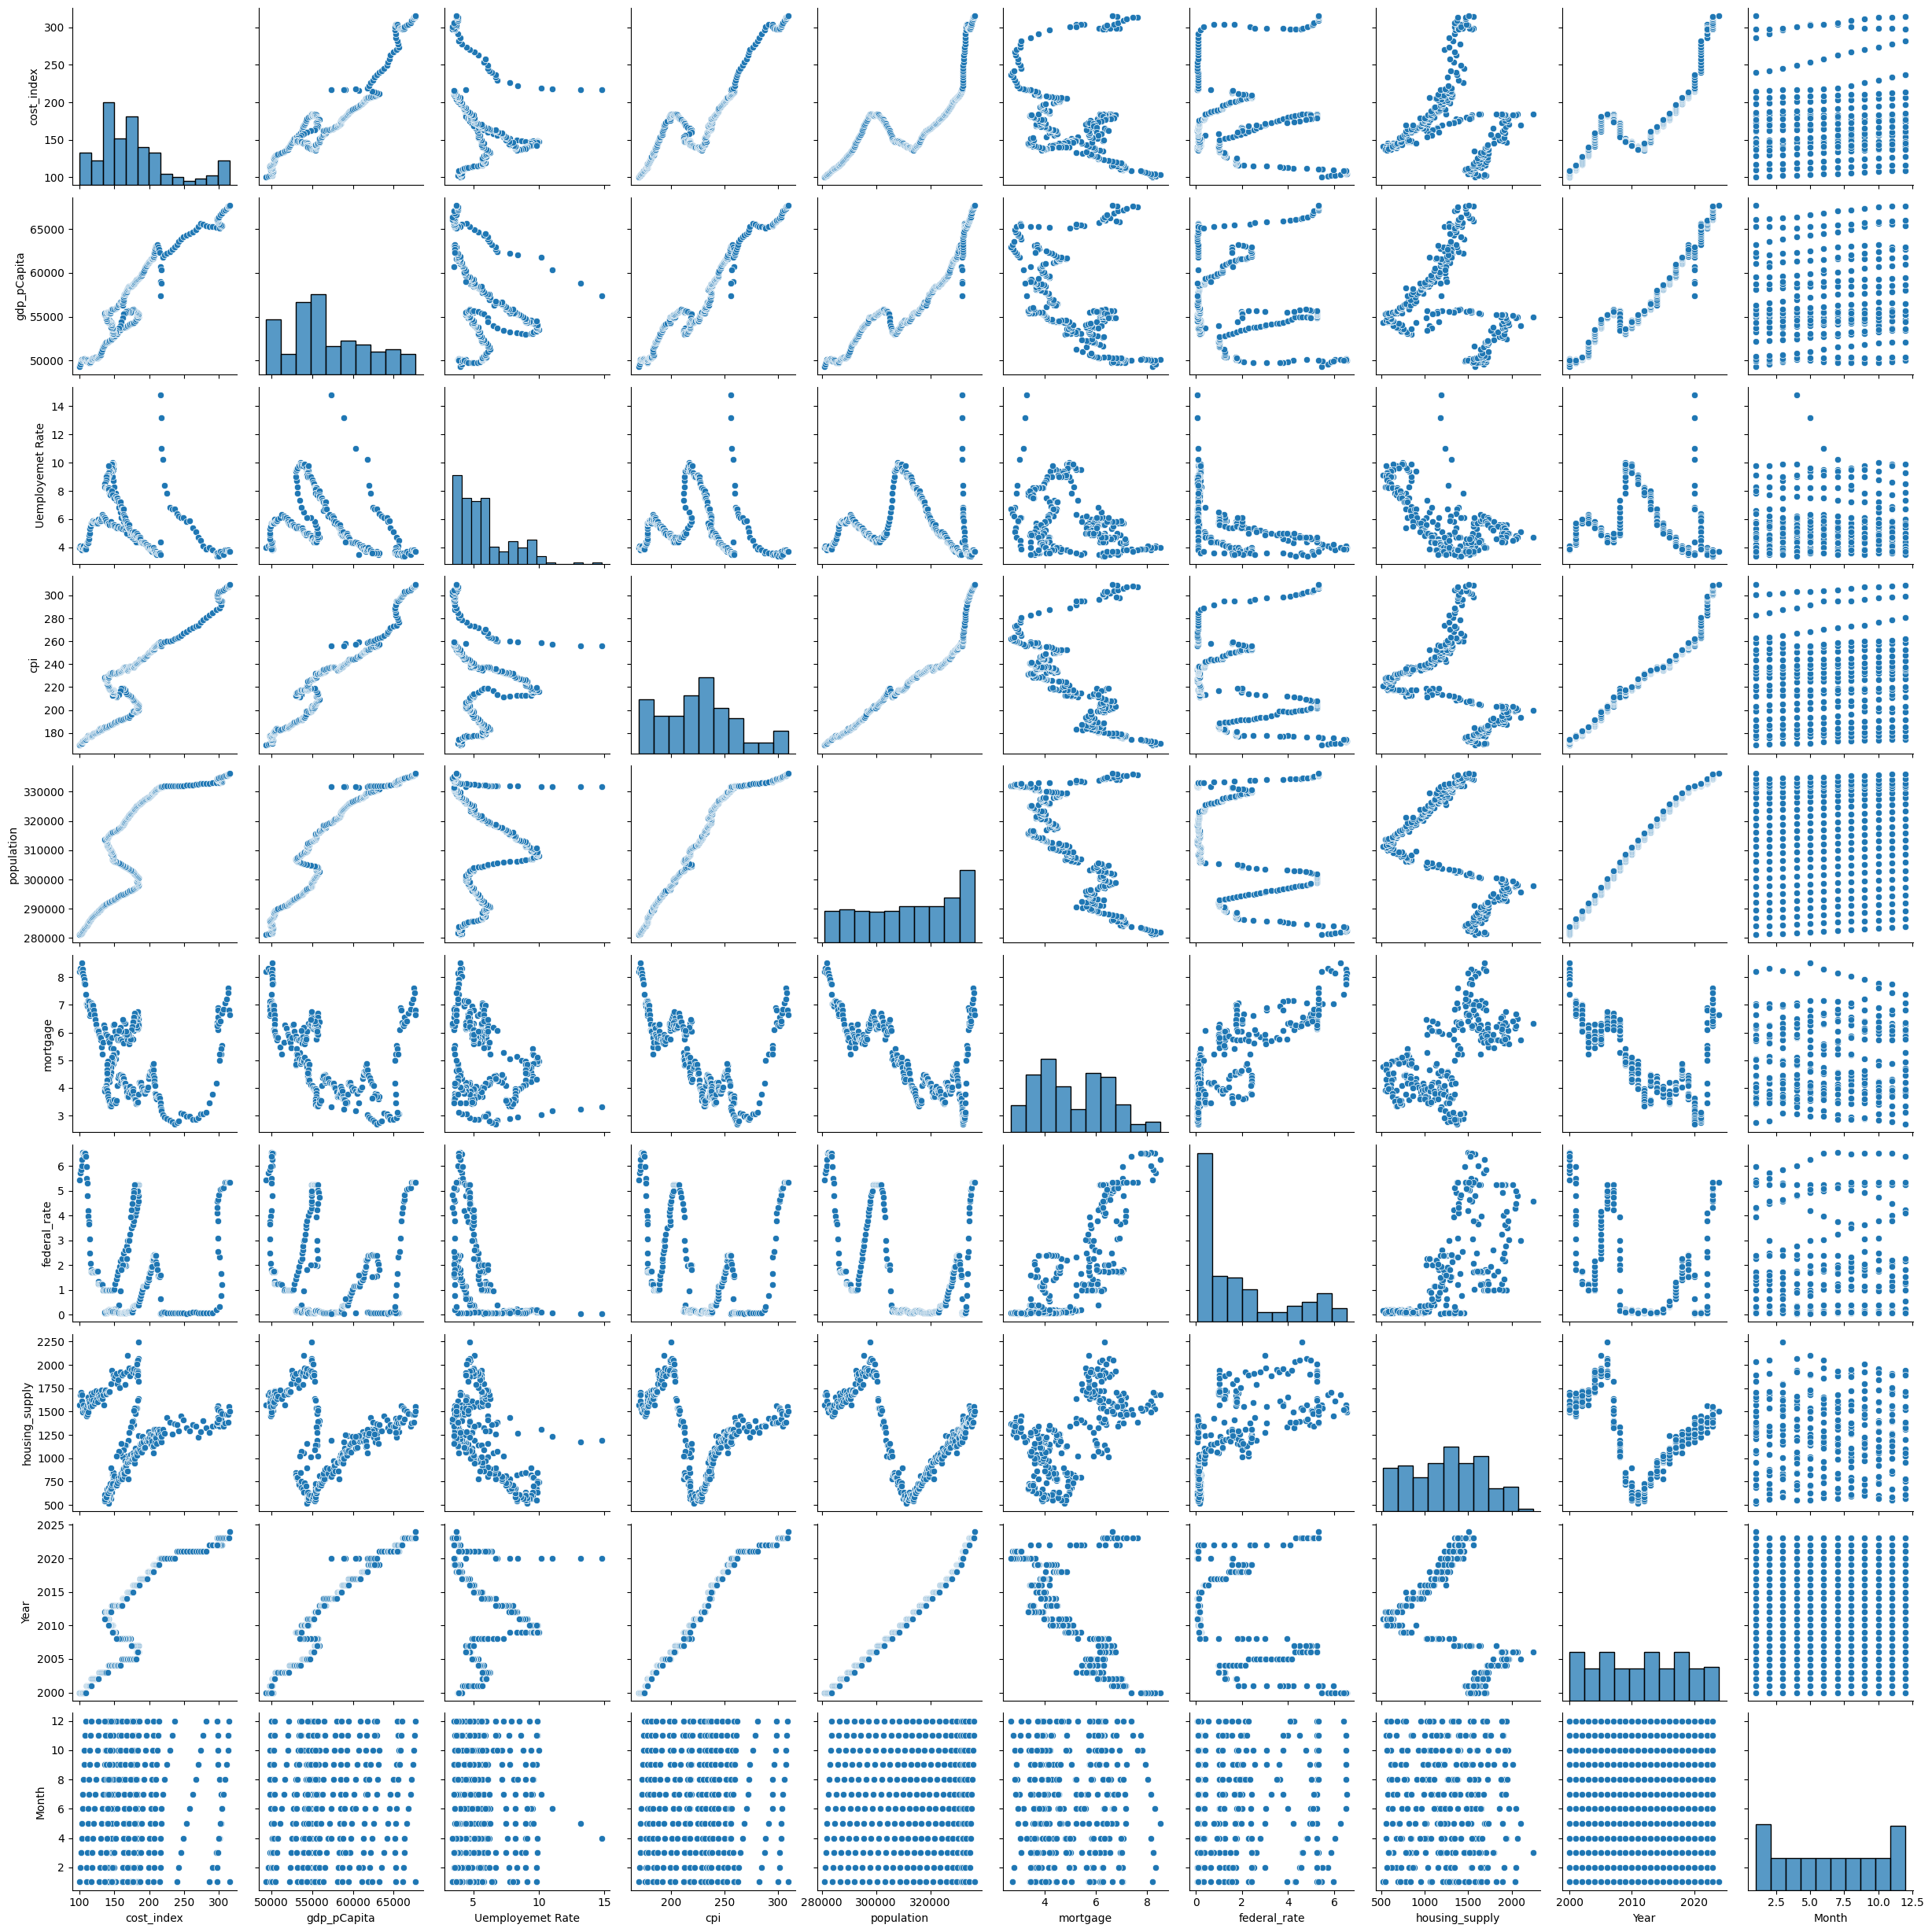

In [143]:
sns.pairplot(df)

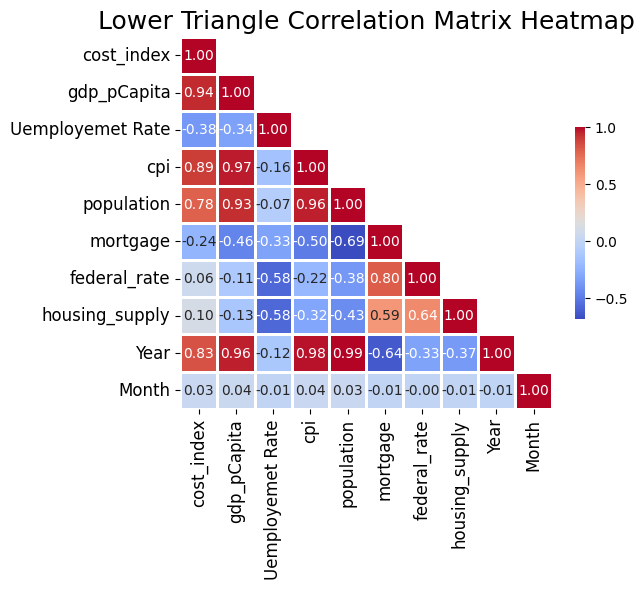

In [158]:
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k = 1)

plt.figure(figsize=(6, 5))  # Larger figure for better readability
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',           # Format the annotations to 2 decimal places
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    cbar_kws={'shrink': 0.5},  # Adjust the size of the color bar
    square=True,
    mask=mask            # Apply the mask to hide the upper triangle
)

# Add title and adjust font sizes
plt.title('Lower Triangle Correlation Matrix Heatmap', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


__Conclusion:__

- Like observed through the scatter plot above, the cost_index is linearly correlated to "per capita GDP", "Year", "CPI", and "Population"
- Unemployement has a negative correlation value for cost_index
- And mortage funds rate is also negatively correlated.
- But, federal funds rate and month have very low correlation with the cost_index.


__Note:__

- The features are also correlated with each other, so let us find out, because if we are to build model, then we might consider dropping them.

<Axes: >

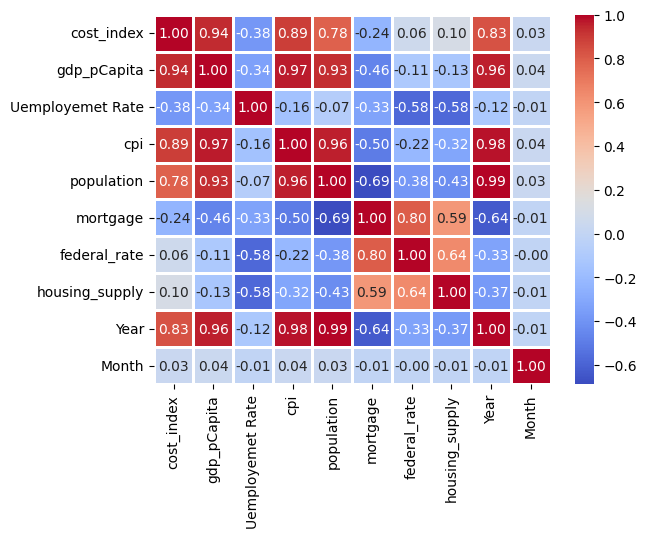

In [152]:
sns.heatmap(df.corr(), annot = True,
           cmap = "coolwarm",
           lw = 1,
           linecolor = 'white',
           fmt = '.2f')

__Note:__

We can also see one more thing here, the other features are also correlated with each other. All the four features which are linearly correlated to our cost_index, as also correlated with each other. 

- As we can see here, all the four features "per capita GDP", "CPI", "Population", and "Year" all are highly correlated with each other. So, we might consider using only using one of these features instead of all of them in the model building!

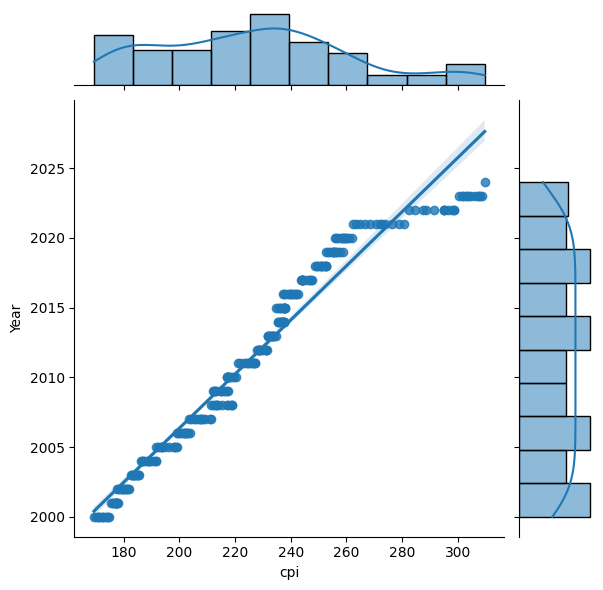

In [168]:
sns.jointplot(x = 'cpi', y = 'Year', data = df, kind = 'reg')

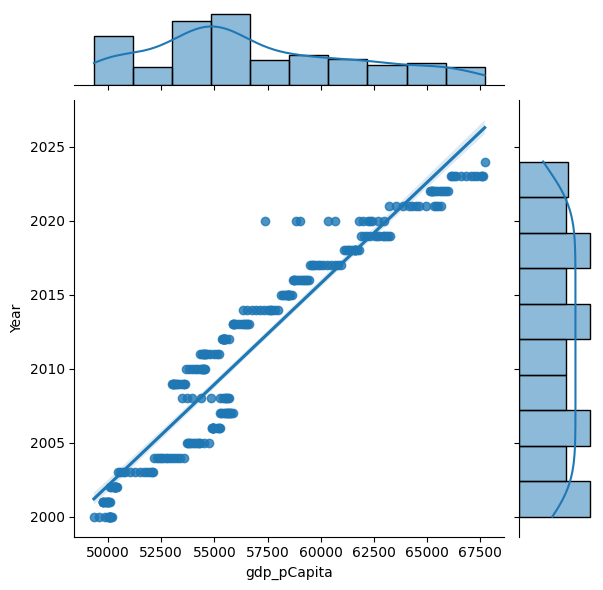

In [169]:
sns.jointplot(x = 'gdp_pCapita', y = 'Year', data = df, kind = 'reg')

Likewise, it'll follow for the other pairs!

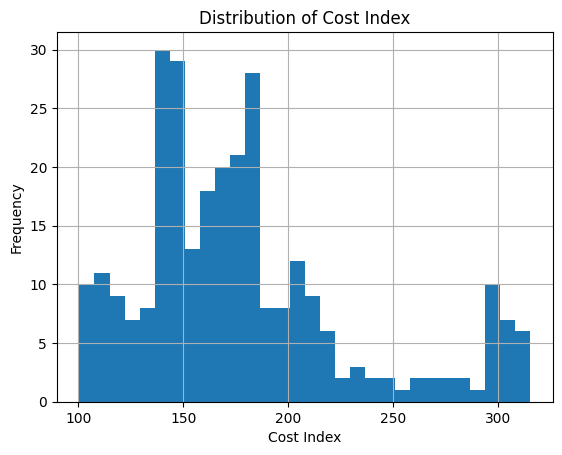

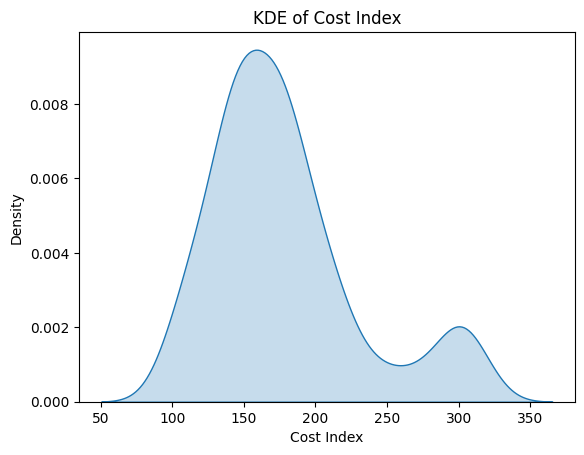

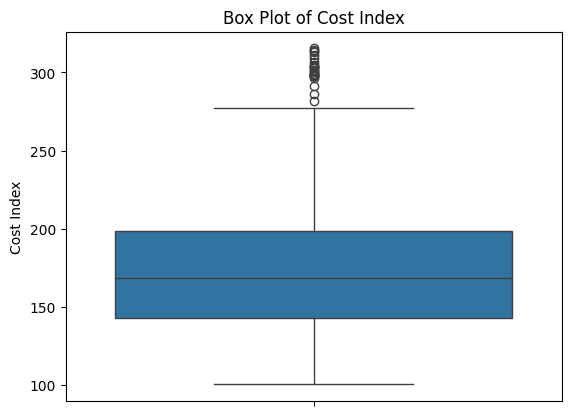

In [171]:
# Histogram
df['cost_index'].hist(bins=30)
plt.xlabel('Cost Index')
plt.ylabel('Frequency')
plt.title('Distribution of Cost Index')
plt.show()

# KDE plot
sns.kdeplot(df['cost_index'], fill=True)
plt.xlabel('Cost Index')
plt.title('KDE of Cost Index')
plt.show()

# Box Plot
sns.boxplot(y=df['cost_index'])
plt.ylabel('Cost Index')
plt.title('Box Plot of Cost Index')
plt.show()


In [184]:
monthly_avg_cost_index = df.groupby('Month').agg({'cost_index':'mean'})

In [185]:
monthly_avg_cost_index

,cost_index
Month,
1,179.026280
2,173.953750
3,174.884583
4,175.667708
5,176.454208
6,177.159583
7,177.855833
8,178.527167
9,179.261292


In [186]:
monthly_avg_cost_index.reset_index()

,Month,cost_index
0,1,179.026280
1,2,173.953750
2,3,174.884583
3,4,175.667708
4,5,176.454208
5,6,177.159583
6,7,177.855833
7,8,178.527167
8,9,179.261292
9,10,180.041833


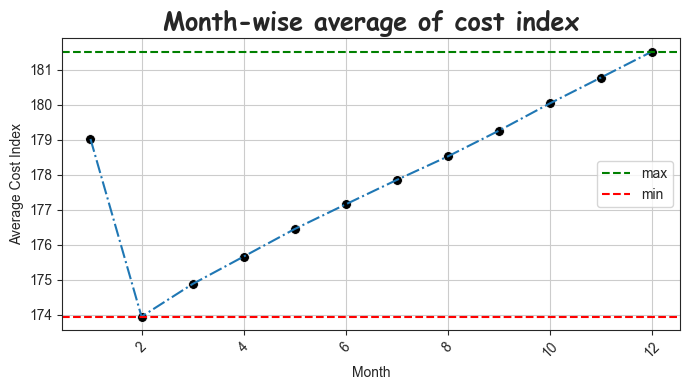

In [204]:
sns.set_style('ticks')

# Set the figure size
plt.figure(figsize=(7, 4))

# Create the plot
sns.lineplot(x='Month', y='cost_index', data=monthly_avg_cost_index, linestyle = 'dashdot')
plt.axhline(y = monthly_avg_cost_index['cost_index'].max(), color = 'green', linestyle = '--', label = 'max')
plt.axhline(y = monthly_avg_cost_index['cost_index'].min(), color = 'red', linestyle = '--', label = 'min')
sns.scatterplot(monthly_avg_cost_index['cost_index'], color='black', marker='o', s=50) 
plt.title('Month-wise average of cost index', fontweight = 'bold', fontsize = 18, family = 'cursive')
plt.grid()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Cost Index')

# Show the plot
plt.tight_layout()
plt.show()


So, can we assume from here that the prices of the house took a dip in the 2nd month of the year and after that it increased up until the end of the year!

## Model Building

In [205]:
df.head()

,cost_index,gdp_pCapita,Uemployemet Rate,cpi,population,mortgage,federal_rate,housing_supply,Year,Month
0,100.552,49335.0,4.0,169.3,281083.0,8.2100,5.448387,1574.0,2000,1
1,101.339,49593.0,4.1,170.0,281299.0,8.3250,5.734828,1677.0,2000,2
2,102.126,49851.0,4.0,171.0,281531.0,8.2400,5.853548,1704.0,2000,3
3,102.922,50109.0,3.8,170.9,281763.0,8.1525,6.019667,1610.0,2000,4
4,103.678,50081.0,4.0,171.2,281996.0,8.5150,6.268065,1682.0,2000,5


In [206]:
df.drop(['gdp_pCapita','cpi','population'], axis = 1, inplace = True)

In [207]:
df.head()

,cost_index,Uemployemet Rate,mortgage,federal_rate,housing_supply,Year,Month
0,100.552,4.0,8.2100,5.448387,1574.0,2000,1
1,101.339,4.1,8.3250,5.734828,1677.0,2000,2
2,102.126,4.0,8.2400,5.853548,1704.0,2000,3
3,102.922,3.8,8.1525,6.019667,1610.0,2000,4
4,103.678,4.0,8.5150,6.268065,1682.0,2000,5


In [208]:
X = df.drop(['cost_index'], axis = 1)
y = df.cost_index

In [209]:
X.head()

,Uemployemet Rate,mortgage,federal_rate,housing_supply,Year,Month
0,4.0,8.2100,5.448387,1574.0,2000,1
1,4.1,8.3250,5.734828,1677.0,2000,2
2,4.0,8.2400,5.853548,1704.0,2000,3
3,3.8,8.1525,6.019667,1610.0,2000,4
4,4.0,8.5150,6.268065,1682.0,2000,5


In [210]:
y.head()

0    100.552
1    101.339
2    102.126
3    102.922
4    103.678
Name: cost_index, dtype: float64

In [211]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [214]:
X_train.shape

(216, 6)

In [215]:
X_test.shape

(73, 6)

In [216]:
y_train.shape

(216,)

In [217]:
y_test.shape

(73,)

### Linear Regression model

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
model = LinearRegression()

In [222]:
model.fit(X_train, y_train)

LinearRegression()

In [223]:
pred = model.predict(X_test)

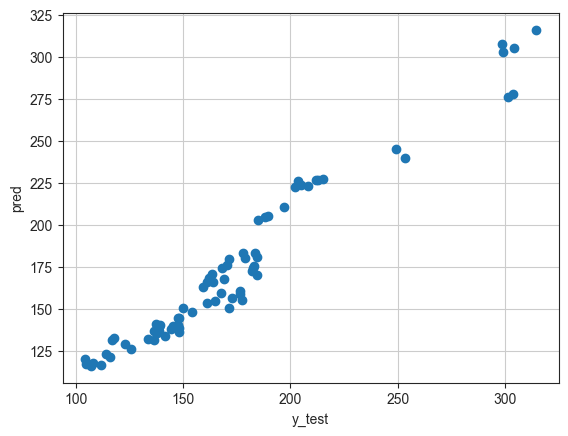

In [225]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [226]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 9.089931097893517
MSE: 125.80582888478044
RMSE: 11.216319756710774


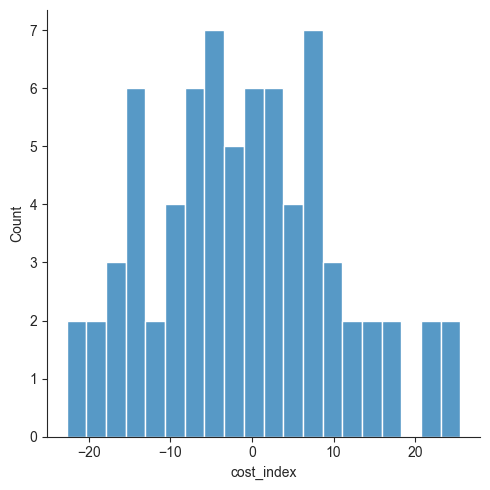

In [231]:
sns.displot((y_test-pred), bins = 20)

### Scaled

In [232]:
X_new = X.copy()

In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
col_names = X_new.columns

In [235]:
scaler = StandardScaler()

In [239]:
X_new = scaler.fit_transform(X_new)

In [240]:
X_new = pd.DataFrame(X_new, columns = col_names)

In [241]:
X_new

,Uemployemet Rate,mortgage,federal_rate,housing_supply,Year,Month
0,-0.892215,2.259853,1.867739,0.760518,-1.661121,-1.583557
1,-0.841417,2.343149,2.014268,1.011782,-1.661121,-1.294638
2,-0.892215,2.281583,2.075000,1.077647,-1.661121,-1.005718
3,-0.993810,2.218205,2.159977,0.848339,-1.661121,-0.716799
4,-0.892215,2.480769,2.287045,1.023979,-1.661121,-0.427880
...,...,...,...,...,...,...
284,-0.993810,1.528295,1.807178,0.497058,1.648672,0.727796
285,-0.993810,1.832508,1.807178,0.292143,1.648672,1.016715
286,-1.044608,1.703580,1.807178,0.497058,1.648672,1.305634
287,-1.044608,1.249434,1.807178,0.719048,1.648672,1.594554


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state = 42)

In [243]:
model1 = LinearRegression()

In [244]:
model1.fit(X_train, y_train)

LinearRegression()

In [245]:
pred = model1.predict(X_test)

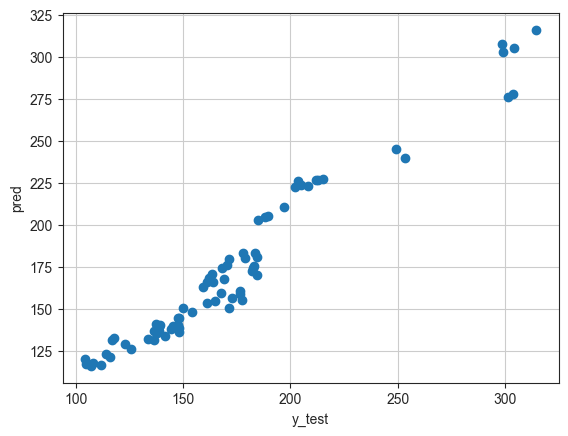

In [246]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [247]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 9.089931097893485
MSE: 125.80582888477574
RMSE: 11.216319756710565


## Feature Selection using Random Forest

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [250]:
rf = RandomForestRegressor(random_state = 0)

In [251]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [252]:
features = X.columns

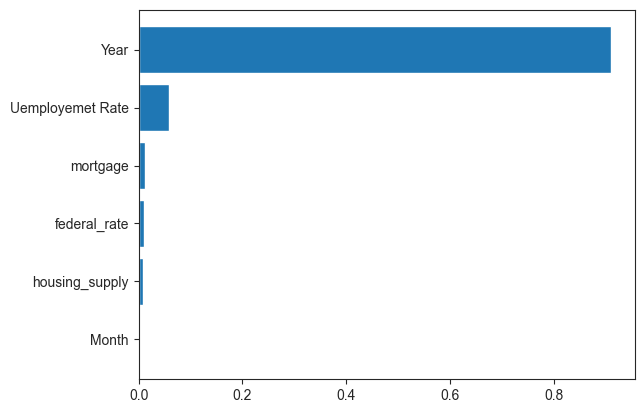

In [254]:
f_i = list(zip(features, rf.feature_importances_))
f_i.sort(key = lambda x: x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

Now, let us explore how different sets of features would yield results!

In [255]:
X.head()

,Uemployemet Rate,mortgage,federal_rate,housing_supply,Year,Month
0,4.0,8.2100,5.448387,1574.0,2000,1
1,4.1,8.3250,5.734828,1677.0,2000,2
2,4.0,8.2400,5.853548,1704.0,2000,3
3,3.8,8.1525,6.019667,1610.0,2000,4
4,4.0,8.5150,6.268065,1682.0,2000,5


In [258]:
X_1 = X[['Year','Uemployemet Rate']]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, random_state = 23)

In [260]:
model2 = LinearRegression()

In [261]:
model2.fit(X_train, y_train)

LinearRegression()

In [262]:
pred = model2.predict(X_test)

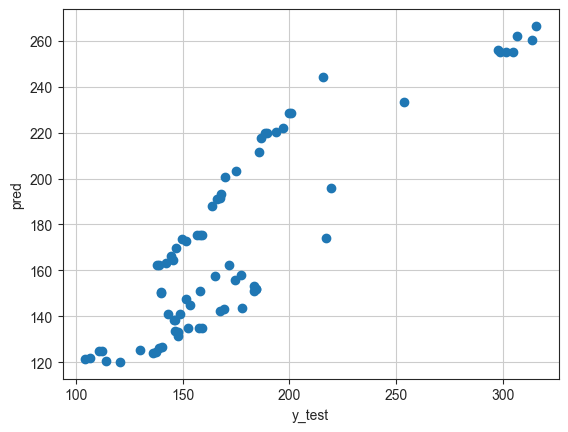

In [263]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [264]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 22.184999959331833
MSE: 630.0440664592134
RMSE: 25.10067860555195


__note:__

We can here see that, even though the other features were not of that much importance, but even the mild cnontribution which they gave to the output was significant!

In [266]:
X_2 = X.drop('Month', axis = 1)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state = 100)

In [268]:
model3 = LinearRegression()

In [269]:
model3.fit(X_train, y_train)

LinearRegression()

In [270]:
pred = model3.predict(X_test)

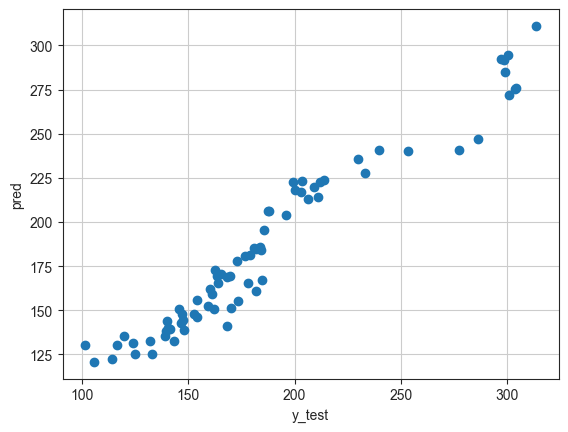

In [271]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [272]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 10.01468163991695
MSE: 182.72991250419682
RMSE: 13.517762851307786


Even though we reduced only one feature, the error increased! Now let us just try other models.

## Decision Tree Regressor Model

In [273]:
from sklearn.tree import DecisionTreeRegressor

In [274]:
dtr_model = DecisionTreeRegressor(random_state = 23)

In [275]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=23)

In [277]:
pred = dtr_model.predict(X_test)

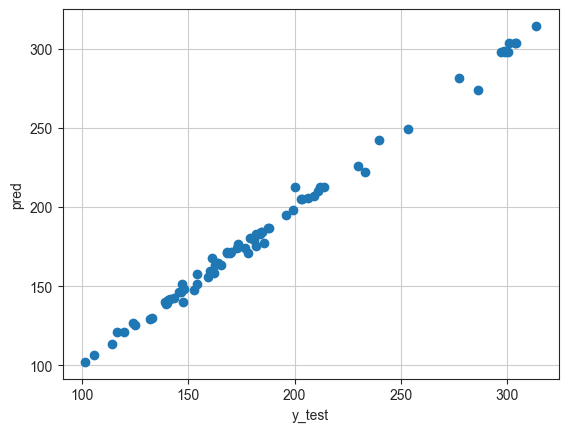

In [278]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [280]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.463931506849316
MSE: 13.42442735616438
RMSE: 3.6639360469533826


## Random Forest Model

In [282]:
from sklearn.ensemble import RandomForestRegressor

In [284]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [285]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [286]:
pred = rf_model.predict(X_test)

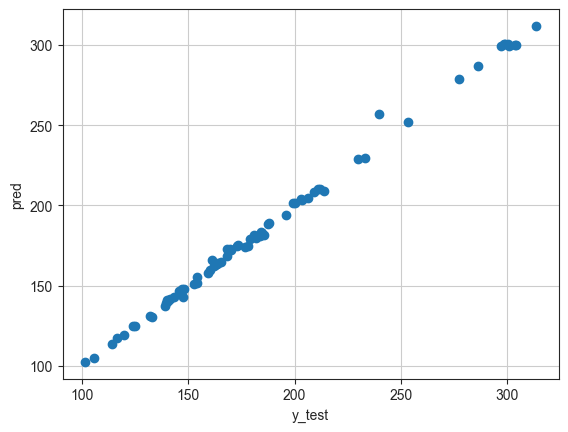

In [287]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [288]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.7308619178082458
MSE: 7.817448028367206
RMSE: 2.7959699619930123


## KNN

In [289]:
from sklearn.neighbors import KNeighborsRegressor

In [290]:
knn_model = KNeighborsRegressor(n_neighbors = 5)

In [291]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [292]:
pred = knn_model.predict(X_test)

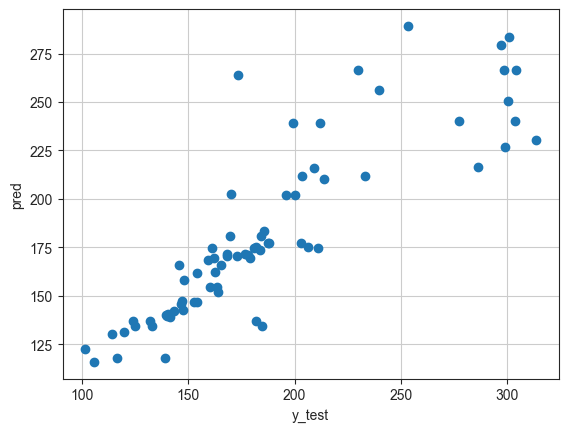

In [293]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [294]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 18.060810958904106
MSE: 743.8510300032875
RMSE: 27.27363250473408


Therefore, the RMSE value is very high for this model. Also, we can try with other different values of the neighbors

In [295]:
X_train.shape[0]

216

In [303]:
data = {}
for k in range(1,int(np.sqrt(216))):
    model_knn = KNeighborsRegressor(n_neighbors = k)
    model_knn.fit(X_train, y_train)
    pred = model_knn.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    data[k] = rmse

In [304]:
data

{1: 22.38702480553938,
 2: 22.38771221303243,
 3: 23.102195204555912,
 4: 25.09806537366687,
 5: 27.27363250473408,
 6: 28.729751133792735,
 7: 27.96842260622209,
 8: 27.460693911853443,
 9: 26.978791590947182,
 10: 27.135010275578544,
 11: 28.25544558035518,
 12: 27.717085486582622,
 13: 26.77844042173559}

RMSE value for all the values of number of neighbor is high. So, KNN is not the right model for this!

## Neural Network Regressor

In [308]:
X_new.head()

,Uemployemet Rate,mortgage,federal_rate,housing_supply,Year,Month
0,-0.892215,2.259853,1.867739,0.760518,-1.661121,-1.583557
1,-0.841417,2.343149,2.014268,1.011782,-1.661121,-1.294638
2,-0.892215,2.281583,2.075000,1.077647,-1.661121,-1.005718
3,-0.993810,2.218205,2.159977,0.848339,-1.661121,-0.716799
4,-0.892215,2.480769,2.287045,1.023979,-1.661121,-0.427880


It is better to have scaled values while working with Neural network!

In [309]:
from sklearn.neural_network import MLPRegressor

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state = 12)

In [311]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,50), activation = 'relu', solver = 'adam', random_state = 42)

In [312]:
mlp_model.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [313]:
pred = mlp_model.predict(X_test)

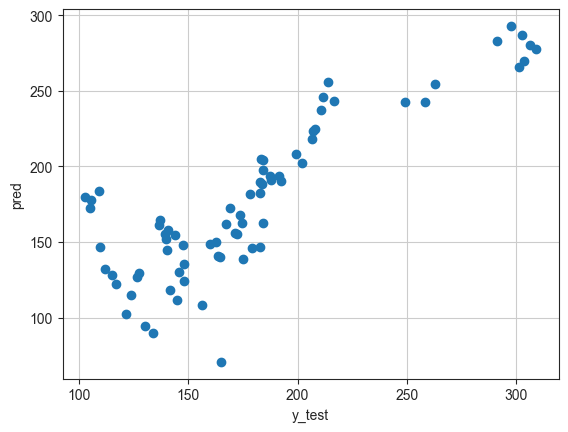

In [314]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.grid()
plt.show()

In [315]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 21.234811382939586
MSE: 825.6800857437152
RMSE: 28.734649567094344


So, the neural network model also didn't work fine for this!

### Conclusion

Random forest regressor is the best fit for this!

So, use the model rf_model for any future prediction of the cost_index